In [1]:
import pandas as pd
df = pd.read_csv('tweets.csv')
print(df.head())

       textID                                               text  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   
1  96d74cb729                                           exciting   
2  eee518ae67                                          Recession   
3  01082688c6                                        happy bday!   
4  33987a8ee5                                        I like it!!   

                  timestamps  
0  2012-12-30 23:56:11+00:00  
1  2012-12-30 23:31:55+00:00  
2  2012-12-30 23:24:56+00:00  
3  2012-12-30 23:23:26+00:00  
4  2012-12-30 23:20:13+00:00  


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pbhad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pbhad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pbhad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and numbers
    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stop words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(preprocess_text)

print(df[['text', 'cleaned_text']].head())

                                                text      cleaned_text
0  Last session of the day  http://twitpic.com/67ezh  last session day
1                                           exciting          exciting
2                                          Recession         recession
3                                        happy bday!        happy bday
4                                        I like it!!              like


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

print(df[['cleaned_text', 'sentiment']].head())


       cleaned_text  sentiment
0  last session day     0.0000
1          exciting     0.4939
2         recession    -0.4215
3        happy bday     0.5719
4              like     0.3612


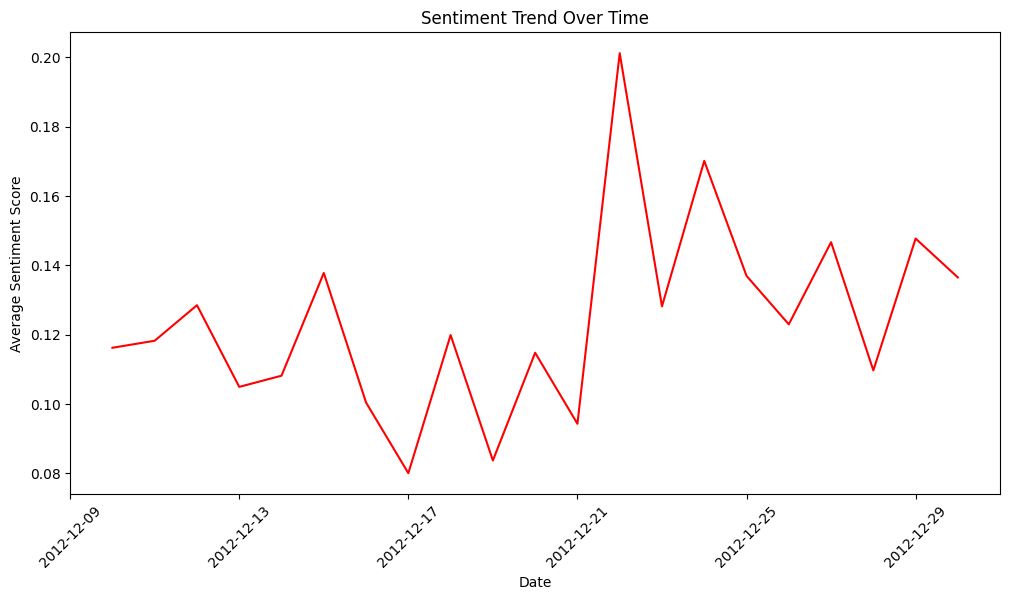

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df['timestamp'] = pd.to_datetime(df['timestamps'])

df['date'] = df['timestamp'].dt.date
sentiment_trend = df.groupby('date')['sentiment'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trend, x='date', y='sentiment', color = 'red')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()
